In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd
import math
import seaborn as sns
import pickle

In [2]:
# N = 100
# r = 1
# df = pd.DataFrame({
#     'F':40*np.random.rand(N)+50
# })

In [3]:
# df['C'] = (5/9)*(df['F']-32) + 1*np.random.normal(size=N)
# df

In [4]:
# pickle.dump( df, open( "save.p", "wb" ) )
# df.drop(columns=['U1*s1' ,'Ftilde' ,'Ctilde'],inplace=True)

In [5]:
df = pickle.load(open( "save.p", "rb" ))
X = df.values

In [6]:
pd.set_option("display.precision", 2)

In [7]:
Xmean = np.mean(X, axis=0)
Xc = X - Xmean
pd.DataFrame(Xc)

,0,1
0,8.78,4.78
1,12.65,6.98
2,-18.42,-9.14
3,6.12,2.75
4,12.47,6.55
...,...,...
95,5.62,3.09
96,2.19,-1.13
97,15.85,10.37
98,-15.19,-8.28


In [8]:
U, s, Vt = svd(Xc,full_matrices=False)
Sigma = np.diag(s)
V = Vt.T

print(Sigma, V)

[[136.56574413   0.        ]
 [  0.           7.78356885]] [[-0.87307782 -0.48758088]
 [-0.48758088  0.87307782]]


In [9]:
r = 1
Ur = U[:,:r]
Vr = V[:,:r]
Sr = Sigma[:r,:r]


In [10]:
XDr = Ur@Sr@Vr.T + Xmean
XDr.shape

(100, 2)

Text(0.5, 0, '')

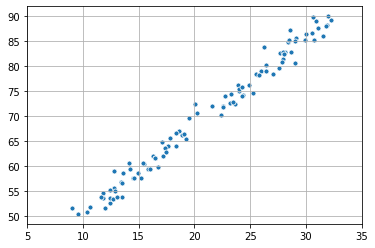

In [11]:
sns.scatterplot(data=df,y='F',x='C',s=100,marker='.')
plt.grid()
# plt.axis('equal')
plt.xlim((5,35))
plt.ylabel('')
plt.xlabel('')

In [12]:
Xrr = Ur@Sr
df2 = pd.DataFrame({'PC1':Xrr[:,0]})
df2

,PC1
0,-10.00
1,-14.45
2,20.54
3,-6.69
4,-14.08
...,...
95,-6.41
96,-1.36
97,-18.89
98,17.29


Text(0.5, 0, '')

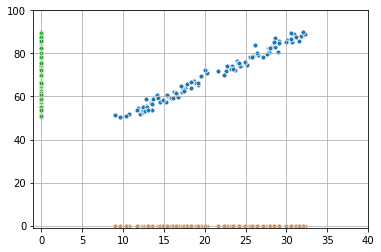

In [13]:
df['z'] = 0 * df['F']
sns.scatterplot(data=df,y='F',x='C',s=100,marker='.')
sns.scatterplot(data=df,y='z',x='C',s=100,marker='.')
sns.scatterplot(data=df,y='F',x='z',s=100,marker='.')
plt.grid()
# plt.axis('equal')
plt.xlim((-1,40))
plt.ylim((-1,100))
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

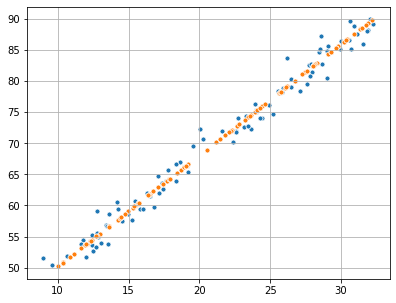

In [14]:
plt.figure(figsize=(6.5,5))
sns.scatterplot(data=df,y='F',x='C',s=100,marker='.')
sns.scatterplot(y=XDr[:,0],x=XDr[:,1],s=100,marker='.')
plt.grid()
plt.ylabel('')
plt.xlabel('')

([], [])

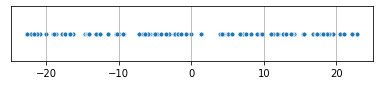

In [15]:
plt.figure(figsize=(6.5,1))
sns.scatterplot(data=df2,x='PC1',y=0,s=100,marker='.')
plt.grid()
plt.xlabel('')
plt.yticks([])

In [16]:
z = df2.describe()
z.loc['max','PC1']-z.loc['min','PC1']

45.43128045394708